<a href="https://colab.research.google.com/github/beercafeguy/PyMLLab/blob/master/DL_Day2_HOML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wide and deep network

In [2]:
import tensorflow as tf
from tensorflow import keras


import pandas as pd
import matplotlib.pyplot as plt

import numpy as np


from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
housing = fetch_california_housing()

In [4]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [8]:
X_train.shape[1:]

(8,)

In [11]:
# stack layers

In [20]:
input_layer = keras.layers.Input(shape=X_train.shape[1:])
hidden_layer_1 = keras.layers.Dense(30, activation='relu')(input_layer)
hidden_layer_2 = keras.layers.Dense(30, activation='relu')(hidden_layer_1)
concat_layer = keras.layers.Concatenate()([input_layer,hidden_layer_2])
output_layer = keras.layers.Dense(1)(concat_layer)
model = keras.Model(inputs = [input_layer], outputs = [output_layer])

In [23]:
#compile the model
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.001), loss="mean_squared_error")


In [24]:
# print the summary
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 8)]                  0         []                            
                                                                                                  
 dense_8 (Dense)             (None, 30)                   270       ['input_4[0][0]']             
                                                                                                  
 dense_9 (Dense)             (None, 30)                   930       ['dense_8[0][0]']             
                                                                                                  
 concatenate_3 (Concatenate  (None, 38)                   0         ['input_4[0][0]',             
 )                                                                   'dense_9[0][0]']       

In [27]:
# train the model

history = model.fit(X_train, y_train,epochs=30, batch_size=32,validation_data=(X_valid,y_valid))

Epoch 1/30
363/363 [==============================] - 2s 5ms/step - loss: 0.4155 - val_loss: 0.4481
Epoch 2/30
363/363 [==============================] - 2s 5ms/step - loss: 0.4134 - val_loss: 0.4463
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4114 - val_loss: 0.4440
Epoch 4/30
363/363 [==============================] - 1s 3ms/step - loss: 0.4093 - val_loss: 0.4420
Epoch 5/30
363/363 [==============================] - 1s 4ms/step - loss: 0.4071 - val_loss: 0.4420
Epoch 6/30
363/363 [==============================] - 2s 4ms/step - loss: 0.4054 - val_loss: 0.4416
Epoch 7/30
363/363 [==============================] - 1s 3ms/step - loss: 0.4035 - val_loss: 0.4386
Epoch 8/30
363/363 [==============================] - 1s 3ms/step - loss: 0.4017 - val_loss: 0.4377
Epoch 9/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3999 - val_loss: 0.4340
Epoch 10/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3983 - val_loss: 0.4333

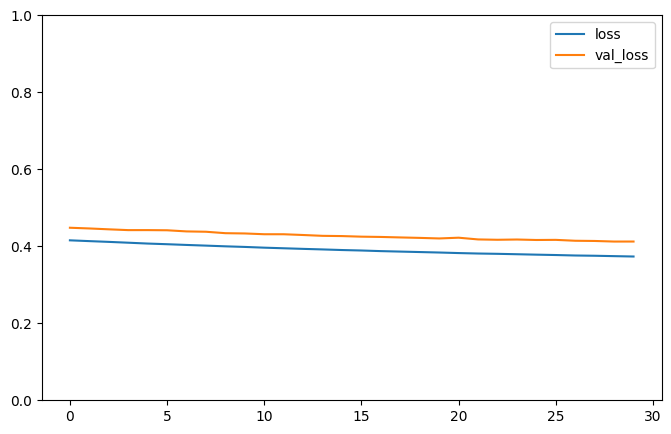

In [31]:
history_pd = pd.DataFrame(history.history)

history_pd.plot(kind='line',figsize=(8,5))
plt.grid=True
plt.gca().set_ylim(0,1)
plt.show()

What if we want to sent just a set of features in deep path and rest in wide path (direct)

In [57]:
wide_input_layer = keras.layers.Input(shape=[5], name="wide_input") # 5 features in wide path (0-4)
deep_input_layer = keras.layers.Input(shape=[6], name="deep_input") # 6 features in deep path (2-7)
hidden_layer_1 = keras.layers.Dense(30, activation='relu')(deep_input_layer)
hidden_layer_2 = keras.layers.Dense(30, activation='relu')(hidden_layer_1)
concat_layer = keras.layers.Concatenate()([wide_input_layer,hidden_layer_2])
output_layer = keras.layers.Dense(1,name="output")(concat_layer)
model = keras.Model(inputs = [wide_input_layer,deep_input_layer], outputs = [output_layer])

In [58]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 deep_input (InputLayer)     [(None, 6)]                  0         []                            
                                                                                                  
 dense_15 (Dense)            (None, 30)                   210       ['deep_input[0][0]']          
                                                                                                  
 wide_input (InputLayer)     [(None, 5)]                  0         []                            
                                                                                                  
 dense_16 (Dense)            (None, 30)                   930       ['dense_15[0][0]']            
                                                                                            

In [59]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.001), loss="mean_squared_error")

In [60]:
X_train_wide,X_train_deep = X_train[:,:5],X_train[:,2:]
X_valid_wide,X_valid_deep = X_valid[:,:5],X_valid[:,2:]
X_test_wide,X_test_deep = X_test[:,:5],X_test[:,2:]

X_new_wide,X_new_deep = X_test[:3,:5],X_test[:3,2:]

In [61]:
history = model.fit(
    (X_train_wide,X_train_deep),
    y_train,
    epochs=30,
    batch_size=32,
    validation_data=((X_valid_wide,X_valid_deep),y_valid)
)

Epoch 1/30
363/363 [==============================] - 1s 3ms/step - loss: 1.6268 - val_loss: 0.8549
Epoch 2/30
363/363 [==============================] - 1s 3ms/step - loss: 0.7471 - val_loss: 0.7033
Epoch 3/30
363/363 [==============================] - 2s 6ms/step - loss: 0.6506 - val_loss: 0.6510
Epoch 4/30
363/363 [==============================] - 1s 3ms/step - loss: 0.6088 - val_loss: 0.6168
Epoch 5/30
363/363 [==============================] - 1s 3ms/step - loss: 0.5778 - val_loss: 0.5867
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5516 - val_loss: 0.5608
Epoch 7/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5297 - val_loss: 0.5413
Epoch 8/30
363/363 [==============================] - 1s 3ms/step - loss: 0.5115 - val_loss: 0.5225
Epoch 9/30
363/363 [==============================] - 1s 3ms/step - loss: 0.4960 - val_loss: 0.5095
Epoch 10/30
363/363 [==============================] - 1s 3ms/step - loss: 0.4834 - val_loss: 0.4973

Note: Here we passed overlapping feature in wide and deep path. Its also possible to just pass separate set of features in both NN branches

In [37]:
mse_test = model.evaluate((X_test_wide,X_test_deep),y_test)
mse_test

162/162 [==============================] - 1s 5ms/step - loss: 0.4180


0.41804710030555725

In [40]:
y_pred = model.predict((X_new_wide,X_new_deep))

1/1 [==============================] - 0s 56ms/step


In [41]:
y_pred

array([[2.5200186],
       [1.5255933],
       [0.6360183]], dtype=float32)

Providing multiple outputs

In [42]:
wide_input_layer = keras.layers.Input(shape=[5], name="wide_input") # 5 features in wide path (0-4)
deep_input_layer = keras.layers.Input(shape=[6], name="deep_input") # 6 features in deep path (2-7)
hidden_layer_1 = keras.layers.Dense(30, activation='relu')(deep_input_layer)
hidden_layer_2 = keras.layers.Dense(30, activation='relu')(hidden_layer_1)
concat_layer = keras.layers.Concatenate()([wide_input_layer,hidden_layer_2])
main_output_layer = keras.layers.Dense(1,name="main_output")(concat_layer)
aux_output_layer = keras.layers.Dense(1,name="aux_output")(hidden_layer_2)
model = keras.Model(inputs = [wide_input_layer,deep_input_layer], outputs = [main_output_layer,aux_output_layer])

In [43]:
# each output needs its own loss function and loss share

optimizer = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss=["mse","mse"],loss_weights = [0.9,0.1],optimizer=optimizer)

In [44]:
history = model.fit(
    (X_train_wide,X_train_deep),
    (y_train,y_train),
    epochs=30,
    batch_size=32,
    validation_data=((X_valid_wide,X_valid_deep),(y_valid,y_valid))
)

Epoch 1/30
363/363 [==============================] - 4s 8ms/step - loss: 3.0093 - main_output_loss: 2.7444 - aux_output_loss: 5.3938 - val_loss: 1.4048 - val_main_output_loss: 1.0861 - val_aux_output_loss: 4.2729
Epoch 2/30
363/363 [==============================] - 1s 4ms/step - loss: 1.1237 - main_output_loss: 0.8699 - aux_output_loss: 3.4086 - val_loss: 0.9625 - val_main_output_loss: 0.7585 - val_aux_output_loss: 2.7987
Epoch 3/30
363/363 [==============================] - 1s 3ms/step - loss: 0.8664 - main_output_loss: 0.6984 - aux_output_loss: 2.3778 - val_loss: 0.8256 - val_main_output_loss: 0.6889 - val_aux_output_loss: 2.0562
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.7721 - main_output_loss: 0.6502 - aux_output_loss: 1.8696 - val_loss: 0.7642 - val_main_output_loss: 0.6612 - val_aux_output_loss: 1.6914
Epoch 5/30
363/363 [==============================] - 1s 3ms/step - loss: 0.7252 - main_output_loss: 0.6260 - aux_output_loss: 1.6173 - val_loss

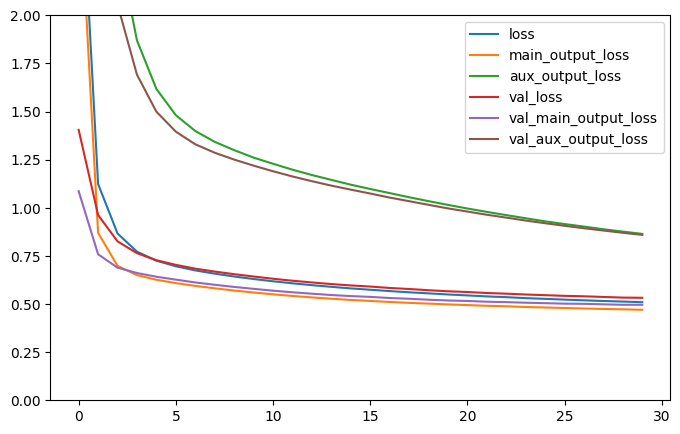

In [46]:
history_pd = pd.DataFrame(history.history)

history_pd.plot(kind='line',figsize=(8,5))
plt.grid=True
plt.gca().set_ylim(0,2)
plt.show()

In [47]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_wide,X_test_deep],[y_test,y_test])

print(total_loss, main_loss, aux_loss)

162/162 [==============================] - 0s 2ms/step - loss: 0.5297 - main_output_loss: 0.4896 - aux_output_loss: 0.8912
0.52974534034729 0.4895850419998169 0.8911865949630737


In [48]:
y_pred_main,y_pred_aux = model.predict([X_new_wide,X_new_deep])

print(y_pred_main,y_pred_aux)

1/1 [==============================] - 0s 116ms/step
[[2.4250772]
 [1.5307469]
 [1.5310884]] [[2.2505352]
 [1.8201339]
 [2.1160994]]


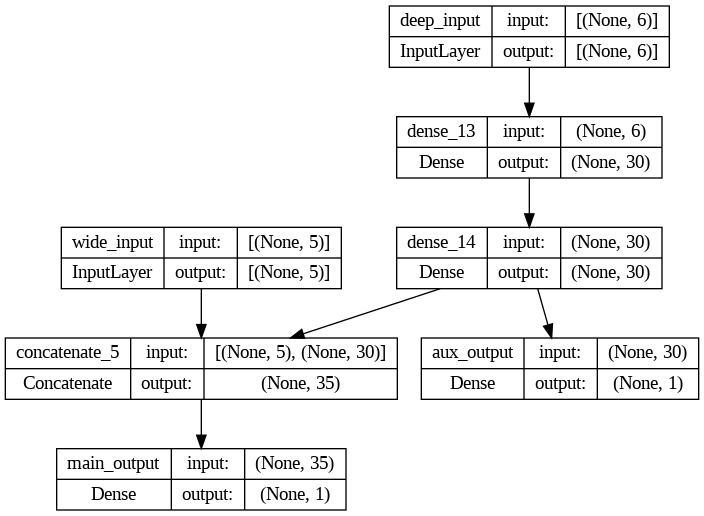

In [50]:
# visualize the model

from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Using the Subclassing API to Build Dynamic Models

In [53]:
class WideAndDeepModel(keras.Model):

  def __init__(self, units=30,activation="relu", **kwargs):

    super().__init__(**kwargs)
    self.hidden_layer_1 = keras.layers.Dense(units, activation=activation, name="hidden_layer_1")
    self.hidden_layer_2 = keras.layers.Dense(units, activation=activation, name="hidden_layer_2")
    self.main_output_layer = keras.layers.Dense(1, name="main_output_layer")
    self.aux_output_layer = keras.layers.Dense(1, name="aux_output_layer")


  def call(self,inputs):

    input_wide, input_deep = inputs
    hidden_layer_1 = self.hidden_layer_1(input_deep)
    hidden_layer_2 = self.hidden_layer_2(hidden_layer_1)

    concat_layer = keras.layers.Concatenate([input_wide, hidden_layer_2])
    main_output_layer = self.main_output_layer(concat_layer)
    aux_output_layer = self.aux_output_layer(hidden_layer_2)

    return main_output_layer, aux_output_layer

In [54]:
model = WideAndDeepModel()

In [55]:
optimizer = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss=["mse","mse"],loss_weights = [0.9,0.1],optimizer=optimizer)

In [62]:
model.save("simple_model_housing_proces.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [63]:
!ls -ltr

total 80
drwxr-xr-x 1 root root  4096 Feb 20 14:29 sample_data
-rw-r--r-- 1 root root 39773 Feb 22 02:55 model_plot.png
-rw-r--r-- 1 root root 36556 Feb 22 03:08 simple_model_housing_proces.h5


In [65]:
# same model intermitantly using callbacks

checkpoint_cb =keras.callbacks.ModelCheckpoint("simple_model_housing_proces.h5")
history = model.fit(
    (X_train_wide,X_train_deep),
    (y_train,y_train),
    epochs=30,
    batch_size=32,
    validation_data=((X_valid_wide,X_valid_deep),(y_valid,y_valid)),
    callbacks=[checkpoint_cb]
)

Epoch 1/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3867 - val_loss: 0.4198
Epoch 2/30
 85/363 [======>.......................] - ETA: 0s - loss: 0.3935

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


363/363 [==============================] - 1s 3ms/step - loss: 0.3858 - val_loss: 0.4190
Epoch 3/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3849 - val_loss: 0.4184
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3839 - val_loss: 0.4185
Epoch 5/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3833 - val_loss: 0.4180
Epoch 6/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3827 - val_loss: 0.4171
Epoch 7/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3817 - val_loss: 0.4161
Epoch 8/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3811 - val_loss: 0.4154
Epoch 9/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3802 - val_loss: 0.4156
Epoch 10/30
363/363 [==============================] - 1s 4ms/step - loss: 0.3794 - val_loss: 0.4141
Epoch 11/30
363/363 [==============================] - 2s 4ms/step - loss: 0.3787 - val_loss: 0.4144
Epoch 12/

In [66]:
# early stopping using callbacks

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(
    (X_train_wide,X_train_deep),
    (y_train,y_train),
    epochs=30,
    batch_size=32,
    validation_data=((X_valid_wide,X_valid_deep),(y_valid,y_valid)),
    callbacks=[checkpoint_cb, early_stopping_cb]
)

Epoch 1/30
363/363 [==============================] - 2s 5ms/step - loss: 0.3657 - val_loss: 0.4031
Epoch 2/30
363/363 [==============================] - 1s 4ms/step - loss: 0.3650 - val_loss: 0.4043
Epoch 3/30
363/363 [==============================] - 1s 4ms/step - loss: 0.3648 - val_loss: 0.4021
Epoch 4/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3641 - val_loss: 0.4032
Epoch 5/30
363/363 [==============================] - 1s 4ms/step - loss: 0.3632 - val_loss: 0.4022
Epoch 6/30
363/363 [==============================] - 1s 4ms/step - loss: 0.3631 - val_loss: 0.4017
Epoch 7/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3623 - val_loss: 0.4001
Epoch 8/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3621 - val_loss: 0.4002
Epoch 9/30
363/363 [==============================] - 1s 4ms/step - loss: 0.3612 - val_loss: 0.3999
Epoch 10/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3609 - val_loss: 0.3995

In [67]:
# custom callbacks

class PrintValTrainRatioCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    print(f"Epoch {epoch} completed")
    print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))


print_callback = PrintValTrainRatioCallback()
history = model.fit(
    (X_train_wide,X_train_deep),
    (y_train,y_train),
    epochs=30,
    batch_size=32,
    validation_data=((X_valid_wide,X_valid_deep),(y_valid,y_valid)),
    callbacks=[checkpoint_cb, early_stopping_cb, print_callback]
)

Epoch 1/30
344/363 [===========================>..] - ETA: 0s - loss: 0.3473Epoch 0 completed

val/train: 1.11
363/363 [==============================] - 2s 6ms/step - loss: 0.3500 - val_loss: 0.3898
Epoch 2/30
 22/363 [>.............................] - ETA: 1s - loss: 0.3594

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


355/363 [============================>.] - ETA: 0s - loss: 0.3506Epoch 1 completed

val/train: 1.12
363/363 [==============================] - 2s 6ms/step - loss: 0.3496 - val_loss: 0.3900
Epoch 3/30
356/363 [============================>.] - ETA: 0s - loss: 0.3502Epoch 2 completed

val/train: 1.11
363/363 [==============================] - 2s 5ms/step - loss: 0.3492 - val_loss: 0.3892
Epoch 4/30
359/363 [============================>.] - ETA: 0s - loss: 0.3483Epoch 3 completed

val/train: 1.12
363/363 [==============================] - 2s 6ms/step - loss: 0.3485 - val_loss: 0.3886
Epoch 5/30
346/363 [===========================>..] - ETA: 0s - loss: 0.3495Epoch 4 completed

val/train: 1.12
363/363 [==============================] - 2s 4ms/step - loss: 0.3480 - val_loss: 0.3885
Epoch 6/30
357/363 [============================>.] - ETA: 0s - loss: 0.3474Epoch 5 completed

val/train: 1.12
363/363 [==============================] - 1s 2ms/step - loss: 0.3477 - val_loss: 0.3880
Epoch 7/30
